# Project 2
## Step 1: Exploring your data.

##### Load your data in using Pandas and start to explore. Save all of your early exploration code here and include in your final submission.

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Loading in dataset using Pandas and raw url for file path
bbdf = pd.read_csv("https://raw.githubusercontent.com/kgracia44/DSI-NYC-1/master/curriculum/week-02/2.4-lab/assets/datasets/billboard.csv?token=ASdKbk0isF0ICc6PWPYtcXLDFS2gsmKRks5XcVPuwA%3D%3D")

In [2]:
#I want to take a peek at the dataset in it's current form
bbdf.head(10)

#Just glancing at the first 10 rows of the data and the column variables, 
#I observed the following (and had the following thoughts): 

#     -83 columns (is there even data in the last columns/later weeks?)
#     -values in the 'weeks' columns are relative ranks of tracks for that week
#     -asterisks are used in place of missing values (will need to replace asterisks with NaN)
#     -the strings in the 'artist.inverted' column are not all formatted the same way 
#         (not sure if that is going to matter for data analysis or not...probably not)
#     -need to reformat the 'time','date.entered','date.peaked' columns
#     -some of the genres seem to overlap (e.g., Rock vs Rock'n'roll) 
#             (also, some artists have seemingly wrong genres listed...not something I 
#              can fix since that's based on opinion...will duly note)


,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,"3,38,00 AM",Rock,"September 23, 2000","November 18, 2000",78,63,49,...,*,*,*,*,*,*,*,*,*,*
1,2000,Santana,"Maria, Maria","4,18,00 AM",Rock,"February 12, 2000","April 8, 2000",15,8,6,...,*,*,*,*,*,*,*,*,*,*
2,2000,Savage Garden,I Knew I Loved You,"4,07,00 AM",Rock,"October 23, 1999","January 29, 2000",71,48,43,...,*,*,*,*,*,*,*,*,*,*
3,2000,Madonna,Music,"3,45,00 AM",Rock,"August 12, 2000","September 16, 2000",41,23,18,...,*,*,*,*,*,*,*,*,*,*
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),"3,38,00 AM",Rock,"August 5, 2000","October 14, 2000",57,47,45,...,*,*,*,*,*,*,*,*,*,*
5,2000,Janet,Doesn't Really Matter,"4,17,00 AM",Rock,"June 17, 2000","August 26, 2000",59,52,43,...,*,*,*,*,*,*,*,*,*,*
6,2000,Destiny's Child,Say My Name,"4,31,00 AM",Rock'n'roll,"December 25, 1999","March 18, 2000",83,83,44,...,*,*,*,*,*,*,*,*,*,*
7,2000,"Iglesias, Enrique",Be With You,"3,36,00 AM",Latin,"April 1, 2000","June 24, 2000",63,45,34,...,*,*,*,*,*,*,*,*,*,*
8,2000,Sisqo,Incomplete,"3,52,00 AM",Rock'n'roll,"June 24, 2000","August 12, 2000",77,66,61,...,*,*,*,*,*,*,*,*,*,*
9,2000,Lonestar,Amazed,"4,25,00 AM",Country,"June 5, 1999","March 4, 2000",81,54,44,...,*,*,*,*,*,*,*,*,*,*


In [3]:
#I just want to make sure the column names don't have any extra spaces and things like that
bbdf.columns

#So the column names seem fine, but I don't like the dots in the column names. I will address
#this in step 2...

Index([u'year', u'artist.inverted', u'track', u'time', u'genre',
       u'date.entered', u'date.peaked', u'x1st.week', u'x2nd.week',
       u'x3rd.week', u'x4th.week', u'x5th.week', u'x6th.week', u'x7th.week',
       u'x8th.week', u'x9th.week', u'x10th.week', u'x11th.week', u'x12th.week',
       u'x13th.week', u'x14th.week', u'x15th.week', u'x16th.week',
       u'x17th.week', u'x18th.week', u'x19th.week', u'x20th.week',
       u'x21st.week', u'x22nd.week', u'x23rd.week', u'x24th.week',
       u'x25th.week', u'x26th.week', u'x27th.week', u'x28th.week',
       u'x29th.week', u'x30th.week', u'x31st.week', u'x32nd.week',
       u'x33rd.week', u'x34th.week', u'x35th.week', u'x36th.week',
       u'x37th.week', u'x38th.week', u'x39th.week', u'x40th.week',
       u'x41st.week', u'x42nd.week', u'x43rd.week', u'x44th.week',
       u'x45th.week', u'x46th.week', u'x47th.week', u'x48th.week',
       u'x49th.week', u'x50th.week', u'x51st.week', u'x52nd.week',
       u'x53rd.week', u'x54th.week', u'x

In [4]:
#Now I want to check out some summary stats.
bbdf.describe()

#So, based on the output, I need to look into the data types of my columns...

,year,x1st.week
count,317.0,317.000000
mean,2000.0,79.958991
std,0.0,14.686865
min,2000.0,15.000000
25%,2000.0,74.000000
50%,2000.0,81.000000
75%,2000.0,91.000000
max,2000.0,100.000000


In [5]:
bbdf.dtypes

#Yeah, I need to change the data types for several columns...I will address this in step 2

year                int64
artist.inverted    object
track              object
time               object
genre              object
date.entered       object
date.peaked        object
x1st.week           int64
x2nd.week          object
x3rd.week          object
x4th.week          object
x5th.week          object
x6th.week          object
x7th.week          object
x8th.week          object
x9th.week          object
x10th.week         object
x11th.week         object
x12th.week         object
x13th.week         object
x14th.week         object
x15th.week         object
x16th.week         object
x17th.week         object
x18th.week         object
x19th.week         object
x20th.week         object
x21st.week         object
x22nd.week         object
x23rd.week         object
                    ...  
x47th.week         object
x48th.week         object
x49th.week         object
x50th.week         object
x51st.week         object
x52nd.week         object
x53rd.week         object
x54th.week  

##### Write a brief description of your data, and any interesting observations you've made thus far. 

There are a total of 83 columns with 76 of those containing rank values per week (76 
weeks). I looked over the first ten rows of data. I observed that the values in the 'weeks' columns are relative ranks of tracks on the Billboard 100 chart for that week. The current dataset uses asterisks in place of missing values. I will need to replace asterisks with NaN. Also, it seems that the final columns (e.g., 68+ weeks) don't have any data (seems like all asterisks). I plan to look into this further somehow (like find total NA in column or something). Perhaps I can drop some columns if no values exist in them. 

The strings in 'artist.inverted' column are not all formatted the same way. Not sure if that is going to matter during the data analysis (I suspect not, but duly noted). The column names do not contain unnecessary spaces nor are they unnecessarily long (in my opinion). However, I will rename the 'artist.inverted' column because that label is inaccurate (names for groups of artists, such as a band, are not inverted). I also don't like the dots in the column names. The dots in the column names might cause confusion while coding. I will need to reformat the values in the following columns: 'time', 'date.entered', 'date.peaked'. After reviewing the values in the 'date.entered' and 'date.peaked' columns, I think I am going to have to create another column using those two columns that will yield more informative date information for each week a track is on the billboard chart.

I also took a look at the data types of each column, and observed that I would have to change them for several columns. I also observed that some of the genres seem to overlap (e.g., Rock vs Rock'n'roll). Also, some artists have seemingly wrong genres listed (e.g., rock for a pop artist). However, this is not something I can fix since that's based on opinion (I think), and so I will just duly note this observation.

_______________________________________________________________
    Data Cleaning Tasks:

    1) replace asterisks with NaN
    2) check if final columns have any data
    3) standardize format of 'artist.inverted' column (optional)
    4) rename 'artist.inverted' column
    5) replace all dots in column names with underscores
    6) reformat the values in the following columns: 'time', 'date.entered', 'date.peaked'
    7) change data types for several columns
    8) group together overlapping categories in 'genres' if appropriate
    9) obtain more informative value from 'date.entered' and 'date.peaked' columns
________________________________________________


(For a quick read of the description of the data, see the data dictionary below:)        

Data Set Characteristics/Data Dictionary:  
___________________________________________________________________________

    Number of Instances: 317 

    Number of Attributes: 83 numeric/categorical predictive (76 of those attributes are 
                           columns for ranks per week) 

    Attribute Information:
    
    - year                      year that track was released
    - artist.inverted           name of artist(s) who are credited for track
    - track                     name of track/song
    - time                      length of track
    - genre                     music category of song
    - date.entered              date a song first entered the billboard top 100
    - date.peaked               date a song reached its highest rank
    - x1st.week - x76th.week    these columns contain the relative rank values of tracks for
                                the specified week 

    Missing Attribute Values: There are missing rank values in many of the week columns.

## Step 2: Clean your data.

##### Do some rudimentary cleaning. Rename any columns that are poorly named, shorten any strings that may be too long, fill in any missing values. Explain your rationale for the way you choose to "impute" the missing data.

In [6]:
# replace asterisks with NaN. I will impute missing data this way because NaN has more 
# functionality in python than the character/string '*'.

bbdf.replace('*', np.nan, inplace = True)
bbdf.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,"3,38,00 AM",Rock,"September 23, 2000","November 18, 2000",78,63,49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria","4,18,00 AM",Rock,"February 12, 2000","April 8, 2000",15,8,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,"4,07,00 AM",Rock,"October 23, 1999","January 29, 2000",71,48,43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,"3,45,00 AM",Rock,"August 12, 2000","September 16, 2000",41,23,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),"3,38,00 AM",Rock,"August 5, 2000","October 14, 2000",57,47,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# check if final columns have any data by:
# 1) checking which columns have NaN, 2) summing total Nan per column, and
# 3) looking for columns with 317 NA values (I will drop these columns since no data exists 
# in them)

print bbdf.isnull().sum()
print 
print
#printing the output for the collapsed data rows
bbdf_w23_w47 = bbdf[bbdf.columns[29:54]]
print bbdf_w23_w47.isnull().sum()

year                 0
artist.inverted      0
track                0
time                 0
genre                0
date.entered         0
date.peaked          0
x1st.week            0
x2nd.week            5
x3rd.week           10
x4th.week           17
x5th.week           25
x6th.week           37
x7th.week           48
x8th.week           57
x9th.week           64
x10th.week          73
x11th.week          81
x12th.week          95
x13th.week         107
x14th.week         113
x15th.week         120
x16th.week         135
x17th.week         140
x18th.week         151
x19th.week         161
x20th.week         171
x21st.week         252
x22nd.week         262
x23rd.week         269
                  ... 
x47th.week         312
x48th.week         313
x49th.week         313
x50th.week         313
x51st.week         313
x52nd.week         313
x53rd.week         313
x54th.week         315
x55th.week         315
x56th.week         315
x57th.week         315
x58th.week         315
x59th.week 

In [8]:
# Based on the output above, I will drop the x66th.week - x76th.week columns 
# because no data exists in them.

bbdf.drop(bbdf.columns[[72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82]], axis=1, inplace = True)
bbdf.head()


,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x56th.week,x57th.week,x58th.week,x59th.week,x60th.week,x61st.week,x62nd.week,x63rd.week,x64th.week,x65th.week
0,2000,Destiny's Child,Independent Women Part I,"3,38,00 AM",Rock,"September 23, 2000","November 18, 2000",78,63,49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria","4,18,00 AM",Rock,"February 12, 2000","April 8, 2000",15,8,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,"4,07,00 AM",Rock,"October 23, 1999","January 29, 2000",71,48,43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,"3,45,00 AM",Rock,"August 12, 2000","September 16, 2000",41,23,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),"3,38,00 AM",Rock,"August 5, 2000","October 14, 2000",57,47,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# rename 'artist.inverted' column
bbdf.rename(columns = {'artist.inverted':'artist'}, inplace = True)
bbdf.head(1)

,year,artist,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x56th.week,x57th.week,x58th.week,x59th.week,x60th.week,x61st.week,x62nd.week,x63rd.week,x64th.week,x65th.week
0,2000,Destiny's Child,Independent Women Part I,"3,38,00 AM",Rock,"September 23, 2000","November 18, 2000",78,63,49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# standardize format of 'artist' column. In other words, I am going to change the
# last_name, first_name strings ==> first_name last_name strings.

bbdf['artist'] = [" ".join(n.split(", ")[::-1]) for n in bbdf['artist']]
bbdf.head(11)

,year,artist,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x56th.week,x57th.week,x58th.week,x59th.week,x60th.week,x61st.week,x62nd.week,x63rd.week,x64th.week,x65th.week
0,2000,Destiny's Child,Independent Women Part I,"3,38,00 AM",Rock,"September 23, 2000","November 18, 2000",78,63,49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria","4,18,00 AM",Rock,"February 12, 2000","April 8, 2000",15,8,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,"4,07,00 AM",Rock,"October 23, 1999","January 29, 2000",71,48,43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,"3,45,00 AM",Rock,"August 12, 2000","September 16, 2000",41,23,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,Christina Aguilera,Come On Over Baby (All I Want Is You),"3,38,00 AM",Rock,"August 5, 2000","October 14, 2000",57,47,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2000,Janet,Doesn't Really Matter,"4,17,00 AM",Rock,"June 17, 2000","August 26, 2000",59,52,43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2000,Destiny's Child,Say My Name,"4,31,00 AM",Rock'n'roll,"December 25, 1999","March 18, 2000",83,83,44,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2000,Enrique Iglesias,Be With You,"3,36,00 AM",Latin,"April 1, 2000","June 24, 2000",63,45,34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2000,Sisqo,Incomplete,"3,52,00 AM",Rock'n'roll,"June 24, 2000","August 12, 2000",77,66,61,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2000,Lonestar,Amazed,"4,25,00 AM",Country,"June 5, 1999","March 4, 2000",81,54,44,...,25,26,31,32,37,42,42,45,50,NaN


In [11]:
# replace all dots in column names with underscores

bbdf.rename(columns=lambda x: x.replace('.', '_'), inplace = True)
bbdf.head(1)

,year,artist,track,time,genre,date_entered,date_peaked,x1st_week,x2nd_week,x3rd_week,...,x56th_week,x57th_week,x58th_week,x59th_week,x60th_week,x61st_week,x62nd_week,x63rd_week,x64th_week,x65th_week
0,2000,Destiny's Child,Independent Women Part I,"3,38,00 AM",Rock,"September 23, 2000","November 18, 2000",78,63,49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# reformat the values in the following columns: 'time', 'date.entered', 'date-peaked'

# I am reformatting and changing the data type of the date columns:
bbdf['date_entered'] = pd.to_datetime(bbdf['date_entered'], infer_datetime_format = True)
bbdf['date_peaked'] = pd.to_datetime(bbdf['date_peaked'], infer_datetime_format = True)

#Below, I am just reformatting the time column. I still need to change its data type.
bbdf['time'] = [":".join(n.split(",")) for n in bbdf['time']]
bbdf['time'] = bbdf['time'].str.strip("AM")

print bbdf['time']
bbdf.head(1)


0      3:38:00 
1      4:18:00 
2      4:07:00 
3      3:45:00 
4      3:38:00 
5      4:17:00 
6      4:31:00 
7      3:36:00 
8      3:52:00 
9      4:25:00 
10     3:10:00 
11     3:18:00 
12     4:01:00 
13     3:52:00 
14     4:03:00 
15     4:12:00 
16     4:14:00 
17     4:04:00 
18     3:50:00 
19     3:43:00 
20     4:21:00 
21     3:50:00 
22     3:24:00 
23     3:48:00 
24     3:53:00 
25     4:05:00 
26     4:00:00 
27     4:16:00 
28     4:57:00 
29     4:34:00 
         ...   
287    3:15:00 
288    3:44:00 
289    3:48:00 
290    4:08:00 
291    4:11:00 
292    3:54:00 
293    4:02:00 
294    4:10:00 
295    3:47:00 
296    3:23:00 
297    4:14:00 
298    3:46:00 
299    5:10:00 
300    4:43:00 
301    4:01:00 
302    2:58:00 
303    4:17:00 
304    3:44:00 
305    4:16:00 
306    5:02:00 
307    4:02:00 
308    4:24:00 
309    4:06:00 
310    4:00:00 
311    3:33:00 
312    3:04:00 
313    3:58:00 
314    3:30:00 
315    3:58:00 
316    3:22:00 
Name: time, dtype: objec

,year,artist,track,time,genre,date_entered,date_peaked,x1st_week,x2nd_week,x3rd_week,...,x56th_week,x57th_week,x58th_week,x59th_week,x60th_week,x61st_week,x62nd_week,x63rd_week,x64th_week,x65th_week
0,2000,Destiny's Child,Independent Women Part I,3:38:00,Rock,2000-09-23,2000-11-18,78,63,49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
bbdf.columns.get_loc("x65th_week")

71

In [14]:
print bbdf.columns[7]

x1st_week


In [15]:
# change data types for several columns

#time ==> timedelta datatype (datetime doesn't make sense for length of track since its not 
#                             refering to time of day; it's referring to duration of time.)

bbdf['time'] = pd.to_timedelta(bbdf['time'], unit = 's')

#2nd - 65th week ==> float

for col_index in range(7,72):
    bbdf[bbdf.columns[col_index]] = pd.to_numeric(bbdf[bbdf.columns[col_index]],errors='coerce')

bbdf.dtypes

year                      int64
artist                   object
track                    object
time            timedelta64[ns]
genre                    object
date_entered     datetime64[ns]
date_peaked      datetime64[ns]
x1st_week                 int64
x2nd_week               float64
x3rd_week               float64
x4th_week               float64
x5th_week               float64
x6th_week               float64
x7th_week               float64
x8th_week               float64
x9th_week               float64
x10th_week              float64
x11th_week              float64
x12th_week              float64
x13th_week              float64
x14th_week              float64
x15th_week              float64
x16th_week              float64
x17th_week              float64
x18th_week              float64
x19th_week              float64
x20th_week              float64
x21st_week              float64
x22nd_week              float64
x23rd_week              float64
                     ...       
x36th_we

In [16]:
bbdf.head(4)

,year,artist,track,time,genre,date_entered,date_peaked,x1st_week,x2nd_week,x3rd_week,...,x56th_week,x57th_week,x58th_week,x59th_week,x60th_week,x61st_week,x62nd_week,x63rd_week,x64th_week,x65th_week
0,2000,Destiny's Child,Independent Women Part I,03:38:00,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",04:18:00,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,04:07:00,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,03:45:00,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# group together overlapping categories in 'genres' if appropriate

bbdf['genre'].value_counts()


Rock           103
Country         74
Rap             58
Rock'n'roll     34
R&B             13
R & B           10
Pop              9
Latin            9
Electronica      4
Gospel           1
Jazz             1
Reggae           1
Name: genre, dtype: int64

In [18]:
#Observing output above, will combine the following genres: Rock and Rock'n'roll, R&B and R & B

bbdf['genre'] = bbdf['genre'].replace("Rock'n'roll","Rock")
bbdf['genre'] = bbdf['genre'].replace("R & B","R&B")

bbdf['genre'].value_counts()


Rock           137
Country         74
Rap             58
R&B             23
Pop              9
Latin            9
Electronica      4
Gospel           1
Jazz             1
Reggae           1
Name: genre, dtype: int64

In [19]:
bbdf.describe(include= 'all')

/Users/cguy/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,year,artist,track,time,genre,date_entered,date_peaked,x1st_week,x2nd_week,x3rd_week,...,x56th_week,x57th_week,x58th_week,x59th_week,x60th_week,x61st_week,x62nd_week,x63rd_week,x64th_week,x65th_week
count,317.0,317,317,317,317,317,317,317.000000,312.000000,307.000000,...,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.0,1.0
unique,NaN,228,316,NaN,10,68,53,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Jay-Z,Where I Wanna Be,NaN,Rock,2000-01-29 00:00:00,2000-12-02 00:00:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,5,2,NaN,137,11,17,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,1999-06-05 00:00:00,2000-01-01 00:00:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2000-12-30 00:00:00,2000-12-30 00:00:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2000.0,NaN,NaN,0 days 04:02:25.552050,NaN,NaN,NaN,79.958991,71.173077,65.045603,...,25.500000,27.50000,31.500000,35.500000,38.000000,42.500000,44.500000,47.500000,50.0,49.0
std,0.0,NaN,NaN,0 days 00:42:24.097057,NaN,NaN,NaN,14.686865,18.200443,20.752302,...,0.707107,2.12132,0.707107,4.949747,1.414214,0.707107,3.535534,3.535534,0.0,NaN
min,2000.0,NaN,NaN,0 days 02:36:00,NaN,NaN,NaN,15.000000,8.000000,6.000000,...,25.000000,26.00000,31.000000,32.000000,37.000000,42.000000,42.000000,45.000000,50.0,49.0
25%,2000.0,NaN,NaN,0 days 03:39:00,NaN,NaN,NaN,74.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Using Pandas' built in `melt` function, pivot the weekly ranking data to be long rather than wide. As a result, you will have removed the 72 'week' columns and replace it with two: Week and Ranking. There will now be multiple entries for each song, one for each week on the Billboard rankings.

In [20]:
# first, I will use pandas melt function to reorganize the weekly ranking data 
# (to be long vs wide)

bbdf_long = pd.melt(bbdf, id_vars=['year','artist','track','time','genre','date_entered', \
                'date_peaked'], var_name = 'week', value_name = 'ranking')

# now I want to sort the data by the track and week to further tidy the dataset

bbdf_long.sort_values(by=['track','week'], inplace=True)

# taking a quick glance at the new dataframe, I see that I need to convert week values from
# strings to numbers. Also, the date_entered and date_peaked columns are not very useful to me 
# in their current form. In the next cell, I will further tidy up my dataset...
bbdf_long.head(5)


,year,artist,track,time,genre,date_entered,date_peaked,week,ranking
2900,2000,Nelly,(Hot S**t) Country Grammar,04:17:00,Rap,2000-04-29,2000-09-16,x10th_week,36.0
3217,2000,Nelly,(Hot S**t) Country Grammar,04:17:00,Rap,2000-04-29,2000-09-16,x11th_week,37.0
3534,2000,Nelly,(Hot S**t) Country Grammar,04:17:00,Rap,2000-04-29,2000-09-16,x12th_week,30.0
3851,2000,Nelly,(Hot S**t) Country Grammar,04:17:00,Rap,2000-04-29,2000-09-16,x13th_week,23.0
4168,2000,Nelly,(Hot S**t) Country Grammar,04:17:00,Rap,2000-04-29,2000-09-16,x14th_week,21.0


In [21]:
from datetime import datetime, timedelta

#first I will change the values in the week column to corresponding numbers...(i.e., extract 
# week number from string)

bbdf_long['week'] = bbdf_long['week'].str.extract('x(\d+)').astype(int)
bbdf_long.tail(20)

/Users/cguy/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)


,year,artist,track,time,genre,date_entered,date_peaked,week,ranking
16016,2000,Alan Jackson,www.memory,02:36:00,Country,2000-11-04,2000-12-23,51,NaN
16333,2000,Alan Jackson,www.memory,02:36:00,Country,2000-11-04,2000-12-23,52,NaN
16650,2000,Alan Jackson,www.memory,02:36:00,Country,2000-11-04,2000-12-23,53,NaN
16967,2000,Alan Jackson,www.memory,02:36:00,Country,2000-11-04,2000-12-23,54,NaN
17284,2000,Alan Jackson,www.memory,02:36:00,Country,2000-11-04,2000-12-23,55,NaN
17601,2000,Alan Jackson,www.memory,02:36:00,Country,2000-11-04,2000-12-23,56,NaN
17918,2000,Alan Jackson,www.memory,02:36:00,Country,2000-11-04,2000-12-23,57,NaN
18235,2000,Alan Jackson,www.memory,02:36:00,Country,2000-11-04,2000-12-23,58,NaN
18552,2000,Alan Jackson,www.memory,02:36:00,Country,2000-11-04,2000-12-23,59,NaN
1434,2000,Alan Jackson,www.memory,02:36:00,Country,2000-11-04,2000-12-23,5,50.0


In [22]:
# Now I can drop all NaN since that would be dropping the rows that don't have a ranking for 
# the week (only ranking column contains NAs after melt)

bbdf_long = bbdf_long.dropna()
bbdf_long.tail(50)

,year,artist,track,time,genre,date_entered,date_peaked,week,ranking
3575,2000,Vertical Horizon,You're A God,03:45:00,Rock,2000-08-26,2000-11-04,12,23.0
3892,2000,Vertical Horizon,You're A God,03:45:00,Rock,2000-08-26,2000-11-04,13,25.0
4209,2000,Vertical Horizon,You're A God,03:45:00,Rock,2000-08-26,2000-11-04,14,32.0
4526,2000,Vertical Horizon,You're A God,03:45:00,Rock,2000-08-26,2000-11-04,15,32.0
4843,2000,Vertical Horizon,You're A God,03:45:00,Rock,2000-08-26,2000-11-04,16,37.0
5160,2000,Vertical Horizon,You're A God,03:45:00,Rock,2000-08-26,2000-11-04,17,37.0
5477,2000,Vertical Horizon,You're A God,03:45:00,Rock,2000-08-26,2000-11-04,18,41.0
5794,2000,Vertical Horizon,You're A God,03:45:00,Rock,2000-08-26,2000-11-04,19,46.0
88,2000,Vertical Horizon,You're A God,03:45:00,Rock,2000-08-26,2000-11-04,1,64.0
6111,2000,Vertical Horizon,You're A God,03:45:00,Rock,2000-08-26,2000-11-04,20,48.0


In [23]:
# Now I want a column with the calculated actual date for the specified week in a new column...

bbdf_long['date_of_week'] = bbdf_long['date_entered'] + \
                                pd.TimedeltaIndex(bbdf_long['week'] - 1, unit='W')
                                                                         
                                                               
# Now I want a column with the calculated number of weeks between date_entered and date_peaked
# in a new column...

bbdf_long['weeks_to_peak'] = (bbdf_long['date_peaked'] - bbdf_long['date_entered']) \
                                                   .apply(lambda x: x/np.timedelta64(1,'W'))
bbdf_long.tail(15)

,year,artist,track,time,genre,date_entered,date_peaked,week,ranking,date_of_week,weeks_to_peak
3019,2000,Alan Jackson,www.memory,02:36:00,Country,2000-11-04,2000-12-23,10,69.0,2001-01-06,7.0
3336,2000,Alan Jackson,www.memory,02:36:00,Country,2000-11-04,2000-12-23,11,63.0,2001-01-13,7.0
3653,2000,Alan Jackson,www.memory,02:36:00,Country,2000-11-04,2000-12-23,12,67.0,2001-01-20,7.0
3970,2000,Alan Jackson,www.memory,02:36:00,Country,2000-11-04,2000-12-23,13,77.0,2001-01-27,7.0
4287,2000,Alan Jackson,www.memory,02:36:00,Country,2000-11-04,2000-12-23,14,89.0,2001-02-03,7.0
4604,2000,Alan Jackson,www.memory,02:36:00,Country,2000-11-04,2000-12-23,15,99.0,2001-02-10,7.0
166,2000,Alan Jackson,www.memory,02:36:00,Country,2000-11-04,2000-12-23,1,75.0,2000-11-04,7.0
483,2000,Alan Jackson,www.memory,02:36:00,Country,2000-11-04,2000-12-23,2,59.0,2000-11-11,7.0
800,2000,Alan Jackson,www.memory,02:36:00,Country,2000-11-04,2000-12-23,3,59.0,2000-11-18,7.0
1117,2000,Alan Jackson,www.memory,02:36:00,Country,2000-11-04,2000-12-23,4,54.0,2000-11-25,7.0


In [24]:
bbdf_long.describe(include='all')

,year,artist,track,time,genre,date_entered,date_peaked,week,ranking,date_of_week,weeks_to_peak
count,5307.0,5307,5307,5307,5307,5307,5307,5307.000000,5307.000000,5307,5307.000000
unique,NaN,228,316,NaN,10,68,53,NaN,NaN,97,NaN
top,NaN,Creed,Higher,NaN,Rock,2000-01-29 00:00:00,2000-12-02 00:00:00,NaN,NaN,2000-09-16 00:00:00,NaN
freq,NaN,104,57,NaN,2587,195,270,NaN,NaN,98,NaN
first,NaN,NaN,NaN,NaN,NaN,1999-06-05 00:00:00,2000-01-01 00:00:00,NaN,NaN,1999-06-05 00:00:00,NaN
last,NaN,NaN,NaN,NaN,NaN,2000-12-30 00:00:00,2000-12-30 00:00:00,NaN,NaN,2001-04-07 00:00:00,NaN
mean,2000.0,NaN,NaN,0 days 04:01:52.198982,NaN,NaN,NaN,11.470699,51.052384,NaN,10.177690
std,0.0,NaN,NaN,0 days 00:39:57.715312,NaN,NaN,NaN,9.001300,28.966198,NaN,7.355922
min,2000.0,NaN,NaN,0 days 02:36:00,NaN,NaN,NaN,1.000000,1.000000,NaN,0.000000
25%,2000.0,NaN,NaN,0 days 03:40:00,NaN,NaN,NaN,5.000000,26.000000,NaN,6.000000


In [25]:
bbdf_long.dtypes

year                       int64
artist                    object
track                     object
time             timedelta64[ns]
genre                     object
date_entered      datetime64[ns]
date_peaked       datetime64[ns]
week                       int64
ranking                  float64
date_of_week      datetime64[ns]
weeks_to_peak            float64
dtype: object

# _________________Pivot Tables_________________________

In [26]:
# Now I will create several pivot tables of variables and groupings of variables 
# that I am interested in. This will inform my data visualizations...

In [74]:
#pivot for no. of weeks on chart, for tracks, genres, time

max_week_tracks = pd.pivot_table(bbdf_long, index=["track"], values=['week'], aggfunc=np.max) 
max_week_tracks.sort_values(by = ['week'], inplace=True)

max_week_genre = pd.pivot_table(bbdf_long, index=["genre"], values=['week'], aggfunc=np.max) 
max_week_genre.sort_values(by = ['week'], inplace=True)

max_week_time = pd.pivot_table(bbdf_long, index=["time"], values=['week'], aggfunc=np.max) 
max_week_time.sort_values(by = ['week'], inplace=True)


# pivot for change in rank, for genres/track, time

delta_peak_genre_tracks = pd.pivot_table(bbdf_long, index=["genre",'track'], values=['ranking'], \
                                                                   aggfunc=[np.amin, np.amax] ) 
delta_peak_genre_tracks.reset_index()
delta_peak_genre_tracks['difference'] = delta_peak_genre_tracks['amax'] - \
                                                                delta_peak_genre_tracks['amin'] 

delta_peak_time = pd.pivot_table(bbdf_long, index=["time"], values=['ranking'], \
                                                                   aggfunc=[np.amin, np.amax] ) 
delta_peak_time.reset_index()
delta_peak_time['difference'] = delta_peak_time['amax'] - delta_peak_time['amin']


#pivot for average no. of weeks on chart, for time

#avg_max_week_genre.sort_values(by = ['week'], inplace=True)
avg_max_week_time = pd.pivot_table(bbdf_long, index=["time"], values=['week']) 
avg_max_week_time.sort_values(by = ['week'], inplace=True)


# pivot for avg. number of weeks rise to peak, by tracks, genres, time

avg_week_to_peak_tracks = pd.pivot_table(bbdf_long, index=["track"], values=['weeks_to_peak']) 
avg_week_to_peak_tracks.sort_values(by = ['weeks_to_peak'], inplace=True)
avg_week_to_peak_tracks.reset_index()

avg_week_to_peak_genre = pd.pivot_table(bbdf_long, index=["genre"], values=['weeks_to_peak']) 
avg_week_to_peak_genre.sort_values(by = ['weeks_to_peak'], inplace=True)
avg_week_to_peak_genre.reset_index()

avg_week_to_peak_time = pd.pivot_table(bbdf_long, index=["time"], values=['weeks_to_peak']) 
avg_week_to_peak_time.sort_values(by = ['weeks_to_peak'], inplace=True)
avg_week_to_peak_time.reset_index()




,time,weeks_to_peak
0,03:58:00,0.000000
1,06:17:00,0.000000
2,05:02:00,0.000000
3,05:10:00,0.000000
4,05:20:00,0.000000
5,05:19:00,0.000000
6,03:07:00,0.000000
7,05:33:00,1.000000
8,07:50:00,2.000000
9,05:00:00,2.928571


             week
genre            
Country       9.0
Electronica   9.5
Gospel       10.5
Jazz          3.0
Latin        11.0
Pop           9.0
R&B           7.0
Rap           9.0
Reggae        8.0
Rock         11.0


## Step 3: Visualize your data.

##### Using a plotting utility of your choice (Tableau or python modules or both), create visualizations that will provide context to your data. There is no minimum or maximum number of graphs you should generate, but there should be a clear and consistent story being told. Give insights to the distribution, statistics, and relationships of the data. 

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline


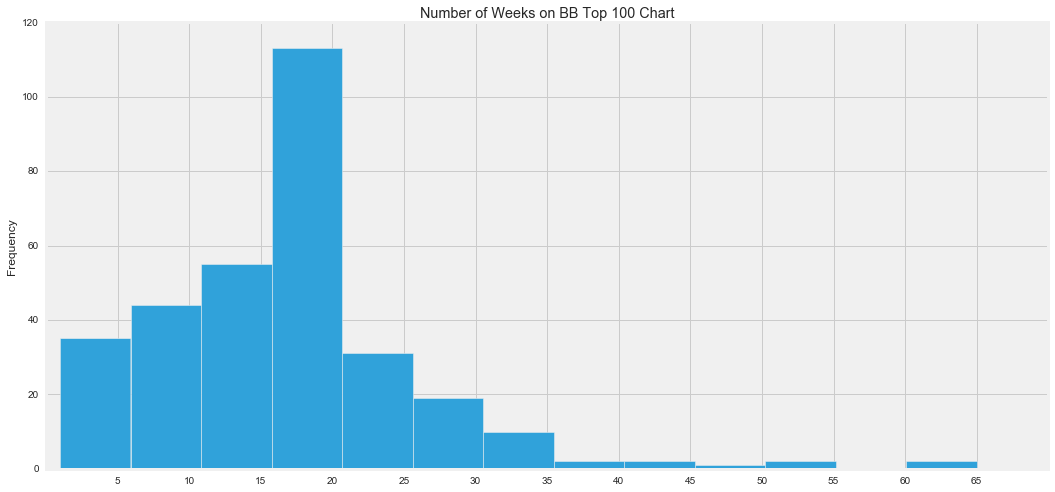

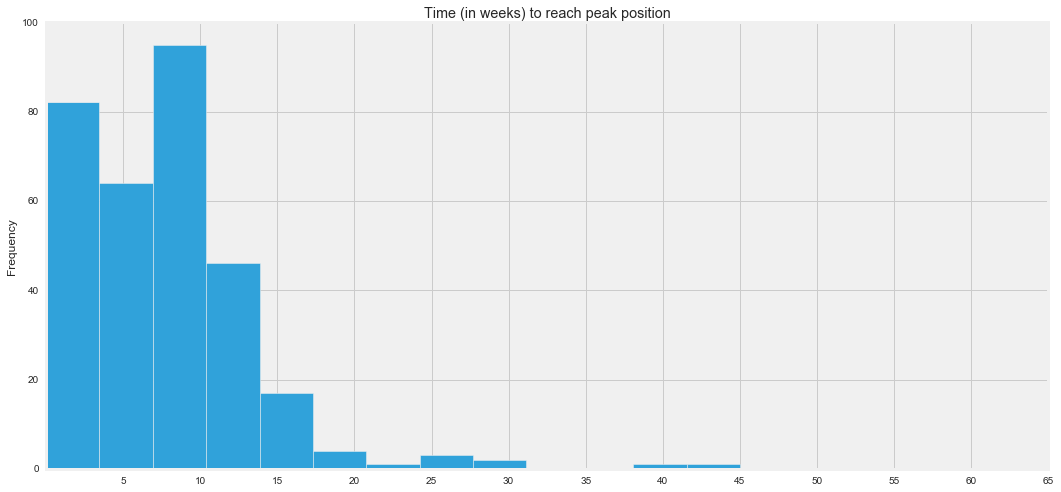

In [50]:
def my_pivot(df, index, values, aggfunc, plt=False):
    piv = pd.pivot_table(df, index=index, values=values, aggfunc=aggfunc)
    #piv.sort_values(by = ['week'], inplace=True)
    #print piv
    if plt: piv.plot(title= 'Number of Weeks on BB Top 100 Chart',kind='hist', figsize=(16,8),\
                         bins=13, xticks=[5,10,15,20,25,30,35,40,45,50,55,60,65], legend=False)

my_pivot(bbdf_long, index=["track"], values=['week'], aggfunc=np.max, plt=True)

def my_pivot_rise(df, index, values, aggfunc, plt=False):
    piv = pd.pivot_table(df, index=index, values=values, aggfunc=aggfunc)
    #piv.sort_values(by = ['week'], inplace=True)
    #print piv
    if plt: piv.plot(title= 'Time (in weeks) to reach peak position', kind='hist', \
        figsize=(16,8), bins=13, xticks=[5,10,15,20,25,30,35,40,45,50,55,60,65], legend=False)


my_pivot_rise(bbdf_long, index=["track"], values=['weeks_to_peak'], aggfunc=np.max, plt=True)


In [51]:
#Examining independent variables

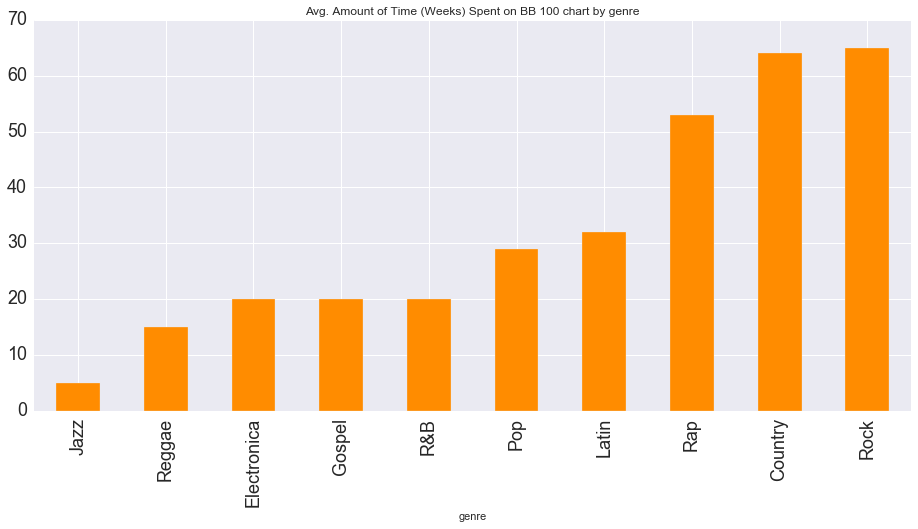

In [154]:
max_week_genre['week'].plot(kind='bar',figsize = (14,7), fontsize = 18, \
            title = 'Avg. Amount of Time (Weeks) Spent on BB 100 chart by genre', color = 'darkorange')


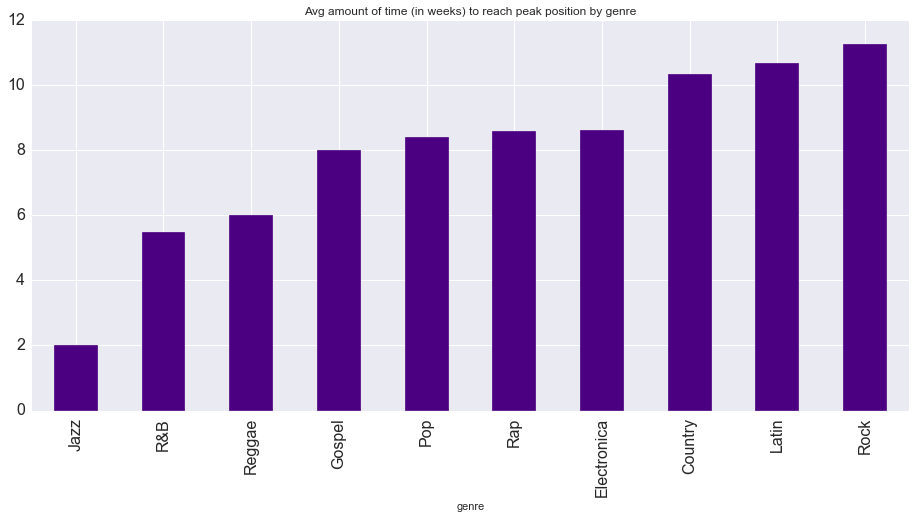

In [153]:
avg_week_to_peak_genre['weeks_to_peak'].plot(kind='bar',figsize = (14,7), fontsize = 16, \
    title = 'Avg amount of time (in weeks) to reach peak position by genre', \
                color = 'indigo')

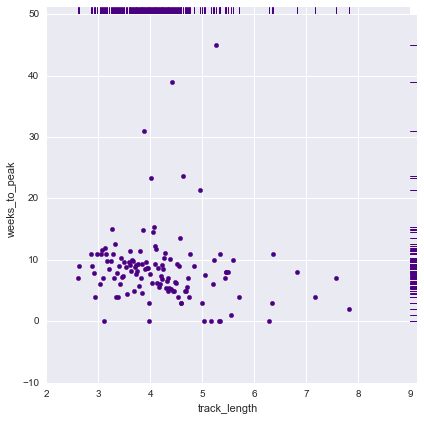

In [151]:
new_df = avg_week_to_peak_time.reset_index()
new_df['track_length'] = new_df['time']/np.timedelta64(1, 'h')
x = new_df['track_length']
y = new_df['weeks_to_peak']


sns.set(style="darkgrid", color_codes=True)

grid = sns.JointGrid(x, y, space=0, size=6, ratio=50)
grid.plot_joint(plt.scatter, color="indigo")
grid.plot_marginals(sns.rugplot, height=1, color="indigo")


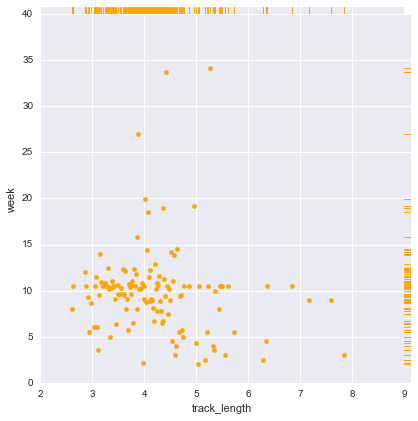

In [146]:
new_df2 = avg_max_week_time.reset_index()
new_df2['track_length'] = new_df2['time']/np.timedelta64(1, 'h')
x = new_df2['track_length']
y = new_df2['week']
#print new_df
#new_df.plot(x='track_length', y='weeks_to_peak', kind='scatter', color='dodgerblue', figsize=(16,8), s=250)
#new_df.plot.scatter(x='track_length', y='weeks_to_peak')


sns.set(style="darkgrid", color_codes=True)

grid = sns.JointGrid(x, y, space=0, size=6, ratio=50)
grid.plot_joint(plt.scatter, color="orange")
grid.plot_marginals(sns.rugplot, height=1, color="orange")

## Step 4: Create a Problem Statement.

##### Having explored the data, come up with a problem statement for this data set. You can feel free to introduce data from any other source to support your problem statement, just be sure to provide a link to the origin of the data. Once again- be creative!

In exploring the questions of 'what made a hit soar to the top of the charts?' and 'how long did a hit stay there?', one first has to set definitons for what qualifies as a successful hit.

I am choosing 2 indicators for a successful hit, which will be the dependent variables of this study. Y1 = Amount of weeks a track took to rise to its peak in year 2000, and Y2 = Number of weeks a track was on the BB Hot 100 Chart for year 2000.

A successful track will have a small Y1 and large Y2.

##Problem Statement: 
Does the genre of a song or its length (in seconds) influence the success of a hit? By comparing genre of song with Y1 and Y2, and track length in seconds with Y1 and Y2, we may observe whether a correlation exists with the independent variables. If a correlation is observed, further investigation is warranted.

Null Hypothesis 1: 
The genre of a song does not impact the success of a hit on the BB Top 100 chart.

Null Hypothesis 2:
The length of a song does not impact the success of a hit on the BB Top 100 chart.

Alternate Hypothesis 1:
The genre of a song does impact the success of a hit on the BB Top 100 chart.

Alternate Hypothesis 2:
The length of a song does impact the success of a hit on the BB Top 100 chart.

Sources support for Null Hypothesis:
http://www.wired.com/2014/07/why-are-songs-on-the-radio-about-the-same-length/

Sources support for Alternate Hypothesis:
http://www.motherjones.com/kevin-drum/2014/08/most-songs-are-three-minutes-long-because-thats-how-most-us-them

State:
Risks:
-when reviewing weeks to reach peak position for songs, there is a risk that 2 songs that did not change much in rank could be considered equally successful by this measure, regardless of how how high or low ranks were. Another risk is that a song can take a long time to rise to its peak (which is penalized) in this measure, even though it rises many ranks.

and assumptions of data:
1) Assuming no situation where two songs from two different artists have the same title
2) Genre is a proxy for artist
    (discuss weird categorizing of some artists)

## Step 5: Brainstorm your Approach.
##### In bullet-list form, provide a proposed approach for evaluating your problem statement. This can be somewhat high-level, but start to think about ways you can massage the data for maximum efficacy. 

-EDA
-2 tailed t-test for one-sample 
-model and see if it fits with data from future years

## Step 6: Create a blog post with your code snippets and visualizations.
##### Data Science is a growing field, and the Tech industry thrives off of collaboration and sharing of knowledge. Blogging is a powerful means for pushing the needle forward in our field. Using your blogging platform of choice, create a post describing each of the 5 steps above. Rather than writing a procedural text, imagine you're describing the data, visualizations, and conclusions you've arrived at to your peers. Aim for a minimum of 500 words. 

In [ ]:
#See blog post on Github
URL: 

## BONUS: The Content Managers working for the Podcast Publishing Company have recognized you as a thought leader in your field. They've asked you to pen a white paper (minimum 500 words) on the subject of 'What It Means To Have Clean Data'. This will be an opinion piece read by a wide audience, so be sure to back up your statements with real world examples or scenarios.

##### Hint: To get started, look around on the internet for articles, blog posts, papers, youtube videos, podcasts, reddit discussions, anything that will help you understand the challenges and implications of dealing with big data. This should be a personal reflection on everything you've learned this week, and the learning goals that have been set out for you going forward. 

Title would have been: The Importance of Clean Data: You reap what you sow

Would have used my blog post as an example of how messy data and underlying assumptions can seriously impact inferences.